In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [3]:
(x_train,y_train),(x_test,y_test) = load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


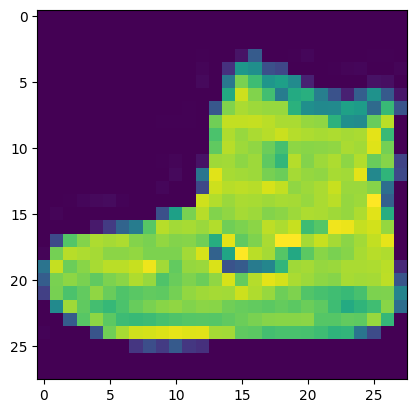

In [4]:
plt.imshow( x_train[0] )
plt.show()

In [5]:
y_train[0]

np.uint8(9)

In [6]:
x_trainN = x_train/255

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
x_trainN.shape

(60000, 28, 28)

In [ ]:
## 10분퀴즈 딥러닝으로 학습후에 test 0번째 이미지를 예측하시요.

In [ ]:
model = Sequential()
model.add( Flatten() ) #28x28 = 784
model.add( Dense( units=64,activation='relu'))
model.add( Dense( units=32,activation='relu'))
model.add( Dense( units=10,activation='softmax'))
early = EarlyStopping(monitor="val_loss", patience=20)
model.compile( loss='sparse_categorical_crossentropy', 
              optimizer=Adam(0.01) ,metrics=['acc'])
model.fit( x_trainN, y_train, validation_split=0.2, epochs=100,
           callbacks=[early])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7547 - loss: 0.6823 - val_acc: 0.8371 - val_loss: 0.4641
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8391 - loss: 0.4467 - val_acc: 0.8337 - val_loss: 0.4488
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8474 - loss: 0.4273 - val_acc: 0.8462 - val_loss: 0.4338
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8532 - loss: 0.4101 - val_acc: 0.8438 - val_loss: 0.4535
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8542 - loss: 0.4048 - val_acc: 0.8517 - val_loss: 0.4279
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8584 - loss: 0.3923 - val_acc: 0.8572 - val_loss: 0.4225
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8679 - loss: 0.3696 - val_acc: 0.8538 - val_loss: 0.4181
Epoch 8/100
 609/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8636 - loss: 0.3746

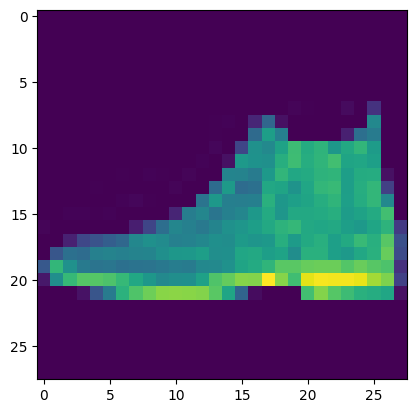

In [12]:
plt.imshow( x_test[0] )
plt.show()

In [13]:
y_test[0]

np.uint8(9)

In [ ]:
model.predict(  x_test[0].reshape( 1, 28,28)/255  ).argmax( axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([9])

In [18]:
# 0. 60000,28,28
# 1. 60000,28x28(784)
# 2. 6000x784 784x64 = 60000x64
# 3. 60000x64 64x32 = 60000x32
# 4. 60000x32 32x10 = 60000x10
pred = model.predict( x_trainN ).argmax(axis=1)
pred

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step


array([9, 0, 0, ..., 3, 0, 5])

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [22]:
c = confusion_matrix( y_train, pred)
c

array([[5139,    8,   72,  369,   27,   16,  332,    0,   37,    0],
       [   8, 5852,    2,   98,   13,   14,   11,    1,    1,    0],
       [  41,    5, 4510,   57, 1072,    3,  298,    1,   13,    0],
       [  85,   21,   36, 5504,  264,    6,   76,    0,    8,    0],
       [   3,    6,  286,  146, 5430,    3,  115,    0,   11,    0],
       [   0,    0,    0,    0,    0, 5856,    1,  118,    8,   17],
       [1116,    1,  509,  225,  922,   12, 3162,    0,   53,    0],
       [   0,    0,    0,    0,    0,  117,    0, 5833,    1,   49],
       [   5,    4,   22,   23,   25,   21,   75,   17, 5808,    0],
       [   0,    0,    0,    0,    0,   93,    0,  399,    4, 5504]])

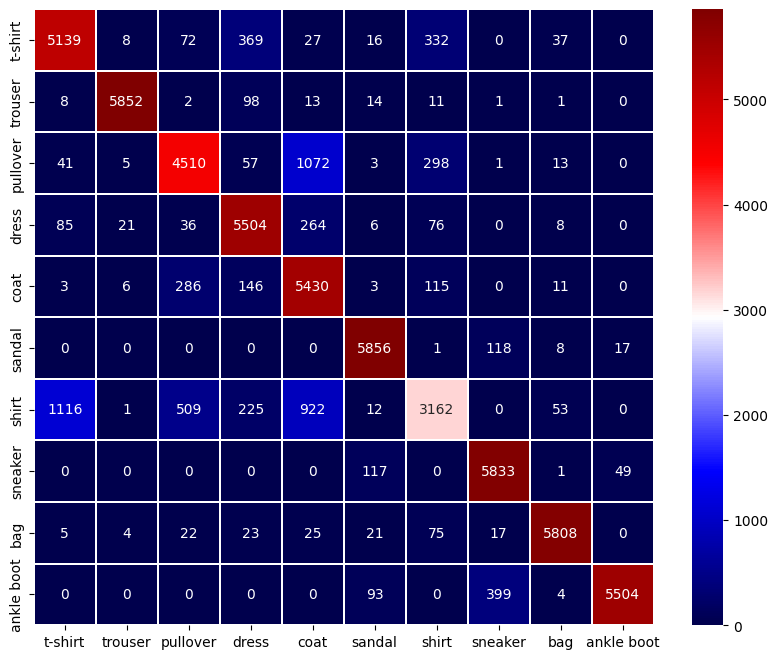

In [31]:
plt.figure( figsize=( 10,8))
sb.heatmap( c, annot=True, fmt='d', cmap='seismic',linewidths=0.2,
           xticklabels=text_labels, yticklabels=text_labels)
plt.show()